In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [45]:
data = pd.read_csv('Tesla.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [46]:
data.shape

(1692, 7)

In [47]:
data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


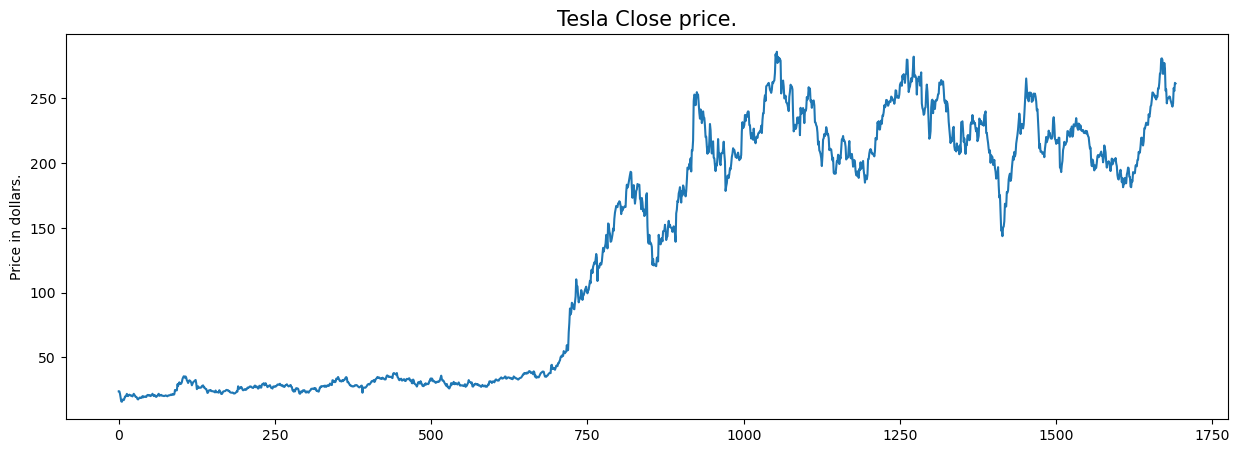

In [49]:
plt.figure(figsize=(15,5))
plt.plot(data['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [50]:
data = data.drop(['Adj Close'], axis=1)

In [51]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [52]:
splitted = data['Date'].str.split('/', expand=True)

data['day'] = splitted[1].astype('int')
data['month'] = splitted[0].astype('int')
data['year'] = splitted[2].astype('int')

data.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [53]:
data['is_quarter_end'] = np.where(data['month']%3==0,1,0)
data.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


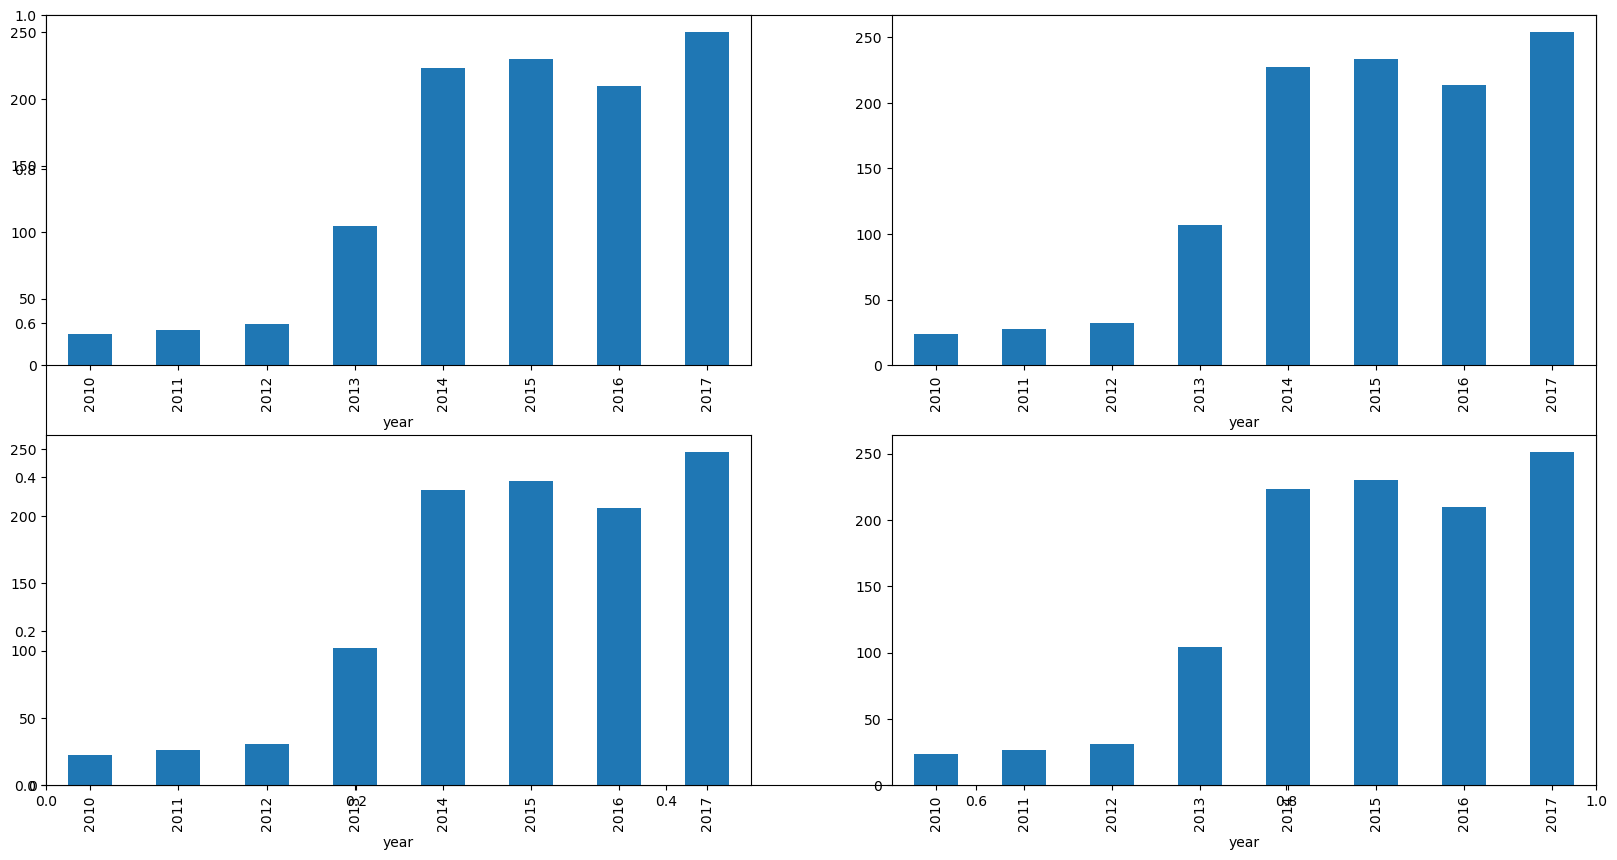

In [54]:
data_grouped = data.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [55]:
data.drop('Date', axis=1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,130.813739,133.182620,128.257229,130.797709,4.461581e+06,15.686501,6.141208,2013.353464
1,135.679982,137.927032,133.455777,135.673269,3.891084e+06,15.657244,7.584806,2013.314488


In [56]:
data['open-close'] = data['Open'] - data['Close']
data['low-high'] = data['Low'] - data['High']
data['target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

In [57]:
x = data[['open-close', 'low-high', 'is_quarter_end']]
y = data['target']

scaler = StandardScaler()
x = scaler.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=2022)

In [58]:
model = LogisticRegression()
model.fit(xtrain, ytrain)
print('Training Accuracy : ', accuracy_score(ytrain, model.predict(xtrain)))
print('Validation Accuracy : ', accuracy_score(ytest, model.predict(xtest)))

Training Accuracy :  0.5223390275952694
Validation Accuracy :  0.5470588235294118


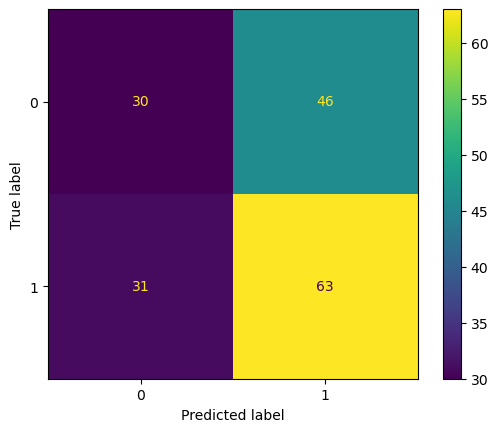

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, xtest, ytest)
plt.show()